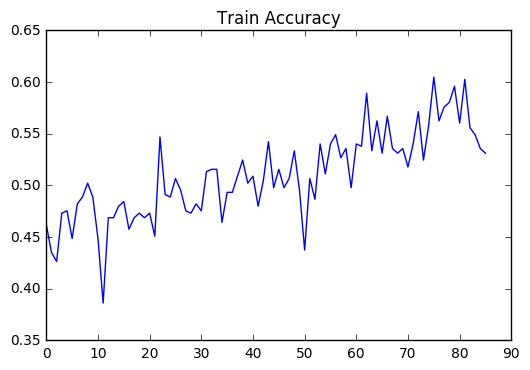

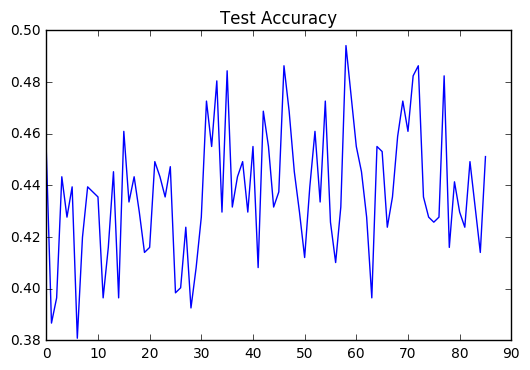

In [14]:
import re
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg


# The analysis for the naive method

with open('EEG_NAIVE_RESULT', 'r') as f:
    f_text = [line for line in f.readlines()]
    f_fulltext = "".join(f_text)
train_pat = "step ([\d]*?), epoch: ([\d]*?), training accuracy ([\d.].*)\n"
train_score = [re.findall(train_pat, text) for text in f_text]
train_score = filter(lambda x: len(x) > 0, train_score)
train_score = map(lambda x: x[0][1:], train_score)
train_score = map(lambda x: (int(x[0]), float(x[1])), train_score)
train_accuracy = [[0, 0.0] for i in range(train_score[-1][0] + 1)]
for x in train_score:
    train_accuracy[x[0]][0] += 1
    train_accuracy[x[0]][1] += x[1]
train_accuracy = map(lambda x: x[1] / x[0], train_accuracy)
plt.plot(range(len(train_accuracy)), train_accuracy)
plt.title("Train Accuracy")
plt.show()

test_pat = "finished epoch: ([\d]*?)\ntest accuracy ([\d.]*)\n"
test_score = re.findall(test_pat, f_fulltext)
test_accuracy = map(lambda x: float(x[1]), test_score)
plt.plot(range(len(test_accuracy)), test_accuracy)
plt.title("Test Accuracy")
plt.show()